<a href="https://colab.research.google.com/github/OtolaHan/Otola_Han_KAAN/blob/main/Transfer_Learning3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Training InceptionV3
Epoch 1/20
100/100 - 27s - loss: 0.3292 - accuracy: 0.8560 - val_loss: 0.1296 - val_accuracy: 0.9530 - 27s/epoch - 268ms/step
Epoch 2/20
100/100 - 19s - loss: 0.2202 - accuracy: 0.9070 - val_loss: 0.1218 - val_accuracy: 0.9540 - 19s/epoch - 193ms/step
Epoch 3/20
100/100 - 20s - loss: 0.2024 - accuracy: 0.9235 - val_loss: 0.1230 - val_accuracy: 0.9600 - 20s/epoch - 195ms/step
Epoch 4/20
100/100 - 20s - loss: 0.2113 - accuracy: 0.9220 - val_loss: 0.2093 - val_accuracy: 0.9300 - 20s/epoch - 199ms/step
Epoch 5/20
100/100 - 19s - loss: 0.2040 - accuracy: 0.9180 - val_loss: 0.1919 - val_accuracy: 0.9330 - 19s/epoch - 188ms/step
Epoch 6/20
100/100 - 20s - loss: 0.1757 - accuracy: 0.9290 - val_loss: 0.1379 - val_accuracy: 0.9500 - 20s/epoch - 201ms/step
Epoch 7/20
100/100 - 19s - loss: 0.1824 - accuracy: 0.9255 - val_loss: 0.1129 - val_accuracy: 0.9590 - 19s/epoch - 189ms/step
Epoch 8/20
10

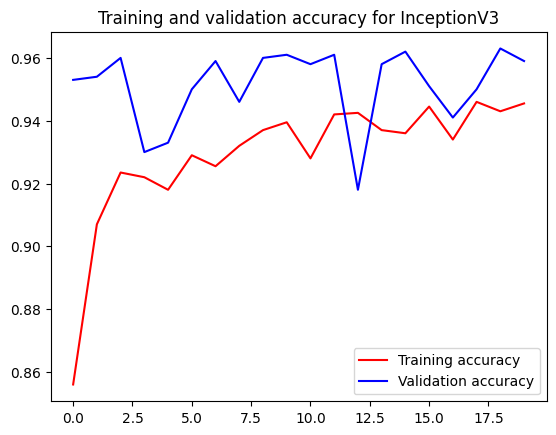

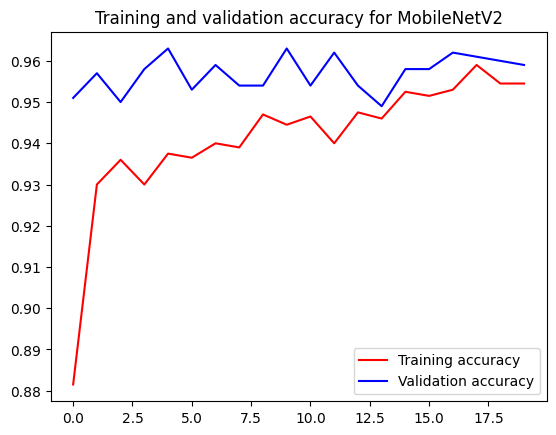

In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3, MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop

# Установите базовый путь к директории, где хранятся данные
base_dir = '/tmp/cats_and_dogs_filtered'

# Установите пути к директориям обучения и валидации
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Параметры обучения
batch_size = 20
target_size = (150, 150)
epochs = 20

# Создание генераторов данных
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary')

# Функция для создания и обучения модели
def train_model(base_model):
    # Замораживаем веса предобученной модели
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    predictions = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

    history = model.fit(
        train_generator,
        steps_per_epoch=np.ceil(train_generator.samples / batch_size),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=np.ceil(validation_generator.samples / batch_size),
        verbose=2)

    return history

# Загрузка и обучение InceptionV3
print("Training InceptionV3")
inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
inception_history = train_model(inception_base)

# Загрузка и обучение MobileNetV2
print("Training MobileNetV2")
mobilenet_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(160, 160, 3))
mobilenet_history = train_model(mobilenet_base)

# Функция для отображения графиков точности
def plot_accuracy(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(len(acc))

    plt.figure()
    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title(title)
    plt.legend(loc=0)
    plt.show()

plot_accuracy(inception_history, 'Training and validation accuracy for InceptionV3')
plot_accuracy(mobilenet_history, 'Training and validation accuracy for MobileNetV2')